## Land Cover Data EDA

**About the data**:
Our land cover data came from the USGS National Land Cover Database (NLCD), which provides nationwide data on land cover and land cover change at a 30m resolution with a 16-class legend based on a modified Anderson Level II classification system. 

Source link: https://www.mrlc.gov/data?f%5B0%5D=category%3Aland%20cover&f%5B1%5D=year%3A2016

#### The land cover class descriptions are as follows:

11: **Open Water**- areas of open water, generally with less than 25% cover of vegetation or soil.

12: **Perennial Ice/Snow**- areas characterized by a perennial cover of ice and/or snow, generally greater than 25% of total cover.

21: **Developed, Open Space**- areas with a mixture of some constructed materials, but mostly vegetation in the form of lawn grasses. Impervious surfaces account for less than 20% of total cover. These areas most commonly include large-lot single-family housing units, parks, golf courses, and vegetation planted in developed settings for recreation, erosion control, or aesthetic purposes.

22: **Developed, Low Intensity**- areas with a mixture of constructed materials and vegetation. Impervious surfaces account for 20% to 49% percent of total cover. These areas most commonly include single-family housing units.

23: **Developed, Medium Intensity**- areas with a mixture of constructed materials and vegetation. Impervious surfaces account for 50% to 79% of the total cover. These areas most commonly include single-family housing units.

24: **Developed High Intensity**- highly developed areas where people reside or work in high numbers. Examples include apartment complexes, row houses and commercial/industrial. Impervious surfaces account for 80% to 100% of the total cover.

31: **Barren Land (Rock/Sand/Clay)** - areas of bedrock, desert pavement, scarps, talus, slides, volcanic material, glacial debris, sand dunes, strip mines, gravel pits and other accumulations of earthen material. Generally, vegetation accounts for less than 15% of total cover.

41: **Deciduous Forest**- areas dominated by trees generally greater than 5 meters tall, and greater than 20% of total vegetation cover. More than 75% of the tree species shed foliage simultaneously in response to seasonal change.

42: **Evergreen Forest**- areas dominated by trees generally greater than 5 meters tall, and greater than 20% of total vegetation cover. More than 75% of the tree species maintain their leaves all year. Canopy is never without green foliage.

43: **Mixed Forest**- areas dominated by trees generally greater than 5 meters tall, and greater than 20% of total vegetation cover. Neither deciduous nor evergreen species are greater than 75% of total tree cover.

52: **Shrub/Scrub**- areas dominated by shrubs; less than 5 meters tall with shrub canopy typically greater than 20% of total vegetation. This class includes true shrubs, young trees in an early successional stage or trees stunted from environmental conditions.

71: **Grassland/Herbaceous**- areas dominated by gramanoid or herbaceous vegetation, generally greater than 80% of total vegetation. These areas are not subject to intensive management such as tilling, but can be utilized for grazing.

81: **Pasture/Hay**-areas of grasses, legumes, or grass-legume mixtures planted for livestock grazing or the production of seed or hay crops, typically on a perennial cycle. Pasture/hay vegetation accounts for greater than 20% of total vegetation.

82: **Cultivated Crops** -areas used for the production of annual crops, such as corn, soybeans, vegetables, tobacco, and cotton, and also perennial woody crops such as orchards and vineyards. Crop vegetation accounts for greater than 20% of total vegetation. This class also includes all land being actively tilled.

90: **Woody Wetlands**- areas where forest or shrubland vegetation accounts for greater than 20% of vegetative cover and the soil or substrate is periodically saturated with or covered with water.

95: **Emergent Herbaceous Wetlands**- Areas where perennial herbaceous vegetation accounts for greater than 80% of vegetative cover and the soil or substrate is periodically saturated with or covered with water.

In [1]:
#Modules
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

import os
import seaborn as sns

In [4]:
#Load data
data = gpd.read_file('Data/CH4_Emitters_All_LU_EmitterType.geojson')

After the data cleaning steps outline in the previous section (which can also be found in the notebook `01_Clean_Land_Cover_USGS`), we now have a dataframe that contains two categories of land cover features: <br>
1. The percent of each land cover class found in each emitter buffer
2. A set of dummy variables for which land cover class was the majority class for that emitter buffer. 



We're interested in looking at which land cover classes were the most common majority class across the emitter buffers. 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

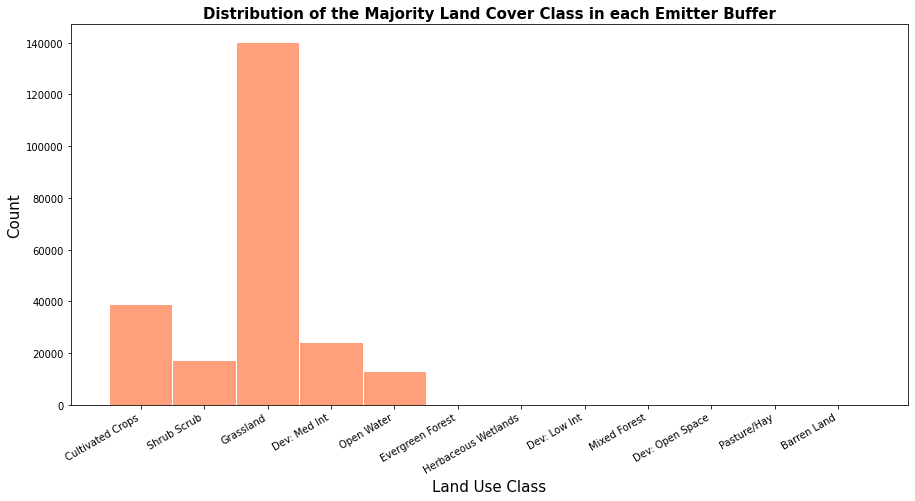

In [12]:
#Plot majority class
fig, ax = plt.subplots(figsize = (15,7))
sns.histplot(data = data, x = 'majority_class', edgecolor = 'white', color = 'coral') 
plt.title('Distribution of the Majority Land Cover Class in each Emitter Buffer', fontweight='bold', size = 15)
ax.set_ylabel('Count', size = 15)
ax.set_xlabel('Land Use Class', size = 15)
plt.xticks(rotation = 30, ha = 'right')

Our plot shows that `Grassland` is the most common majority land class type, followed by `Cultivated Crops`, `Developed: Medium Intensity`, and `Shrub Scrub`. We can also plot the log of the count of each majority class so that we can see more of the distribution from the other categories. 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

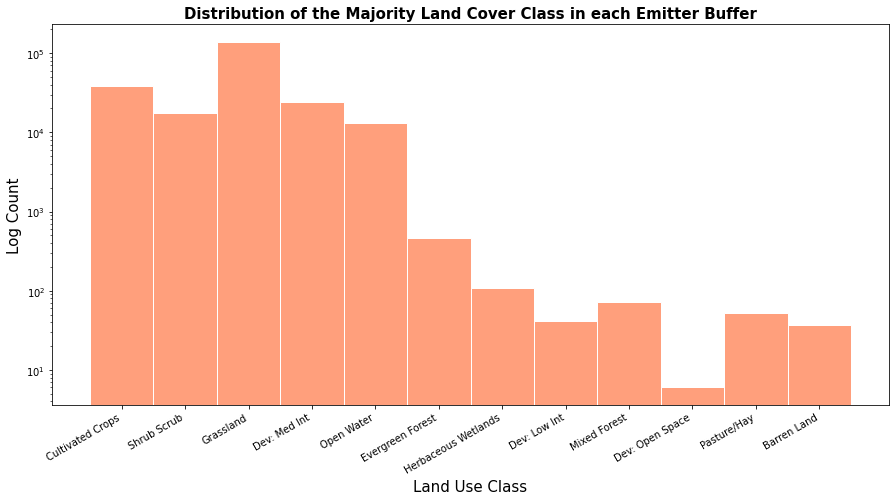

In [13]:
#Plot majority class (log scale)
fig, ax = plt.subplots(figsize = (15,7))
sns.histplot(data = data, x = 'majority_class', edgecolor = 'white', color = 'coral') 
plt.title('Distribution of the Majority Land Cover Class in each Emitter Buffer', fontweight='bold', size = 15)
ax.set_ylabel('Log Count', size = 15)
ax.set_xlabel('Land Use Class', size = 15)
ax.set_yscale('log')
plt.xticks(rotation = 30, ha = 'right')

We can also look at some descriptive statistics of our Land Cover Percent columns. 

In [11]:
#Plot descriptive statistics for each land cover
columns = data.columns[16:32]

for column in columns:
    print(data[column].describe())

count    234567.000000
mean          0.036460
std           0.100731
min           0.000000
25%           0.000465
50%           0.001951
75%           0.003436
max           1.000000
Name: open_water_perc, dtype: float64
count    2.345670e+05
mean     3.836023e-08
std      9.429771e-06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.868060e-03
Name: ice_snow_perc, dtype: float64
count    234567.000000
mean          0.085626
std           0.044710
min           0.000000
25%           0.040934
50%           0.089749
75%           0.126910
max           0.241103
Name: developed_open_space_perc, dtype: float64
count    234567.000000
mean          0.040336
std           0.044280
min           0.000000
25%           0.013109
50%           0.018386
75%           0.061465
max           0.365271
Name: developed_low_int_perc, dtype: float64
count    234567.000000
mean          0.082450
std           0.135516
min           0.000000
25%          

`Grassland` makes up an average of 40% of the pixel classes across emitter buffers, followed by `Cultivated Crops` at 21%. Other significant classes include `Dev: Open Space` at an average of 8.5%, `Dev: Medium Intensity` at 8.2%, `Shrub Scrub` at 7.9%. 

## Emitter Type EDA

**About the data:** The VISTA-CA dataset from Oak Ridge National Lab Distributed Active Archived Center has the locations of known and expected sources of methane emissions from California. These locations were sourced from several local, state, and federal datasets. 

Citation: Hopkins, F.M., T. Rafiq, and R.M. Duren. 2019. Sources of Methane Emissions (Vista-CA), State of California, USA. ORNL DAAC, Oak Ridge, Tennessee, USA.

Following the one-hot encoding step outlined in the previous section (which can also be found in the notebook `01_Clean_Land_Cover_USGS`), for this feature we have a set of dummy variables for each emitter type found in the VISTA-CA dataset. 

We're interested in looking at the distribution of emitter types across the dataset. 

Text(0, 0.5, '')

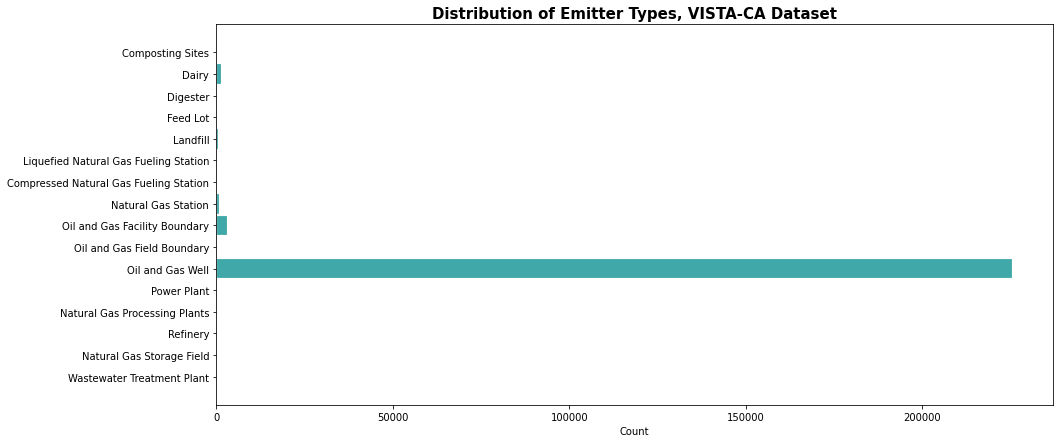

In [14]:
#Plot distribution of emitter types
fig, ax = plt.subplots(figsize = (15,7))
sns.histplot(data = data, y = 'Vista_SType', edgecolor = 'white',  color = 'darkcyan')
plt.title('Distribution of Emitter Types, VISTA-CA Dataset', fontweight='bold', size = 15)
ax.set_ylabel('')

`Oil and Gas wells` clearly dominate the dataset as the most common emitter type. With this category included, we can barely see the count of the other emitter types. We'll try removing this category to take a closer look at the distribution of the other types of emitters. 

In [15]:
#Remove oil and gas well so we can take a closer look at the distribution of the other types of emitters
data_nowells = data[data['Vista_SType'] != 'Oil and Gas Well']

Text(0, 0.5, '')

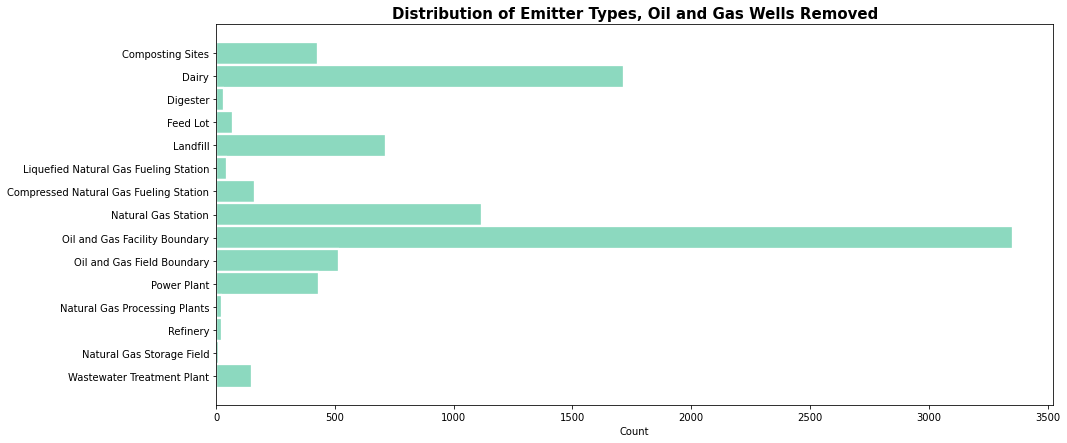

In [16]:
#Plot without oil and gas wells
fig, ax = plt.subplots(figsize = (15,7))
sns.histplot(data = data_nowells, y = 'Vista_SType', edgecolor = 'white',  color = 'mediumaquamarine')
plt.title('Distribution of Emitter Types, Oil and Gas Wells Removed', fontweight='bold', size = 15)
ax.set_ylabel('')

From this graph, we can see that the second most common emitter type is `Oil and Gas Facility Boundary`, followed by `Dairy`, `Natural Gas Station`, and `Landfill`. 